<h1 align=center><font size = 5>Análise de Dados com Python</font></h1>

<h2>Sumário</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
    <li><a href="#data_acquisition">Aquisição de Dados</a></li>
    <li><a href="#basic_insight">Visualização Básica do Conjunto de Dados</a></li>
    <li><a href="#data-transformation">Transformação dos Dados</a></li>
    <li><a href="#data_standardization">Padronização dos Dados</a></li>
    <li><a href="#data_normalization">Normalização dos Dados</a></li>
</ul>
</div>
 
<hr>

In [1]:
# Bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

<h1 id="data_acquisition">Aquisição dos Dados</h1>
<h3>Contexto</h3>
<p>
Este conjunto de dados consiste de dados do Anuário Automotivo de 1985 da Ward. Os dados são oriundos de:

Fontes:

1) Especificações de importação de carros e caminhões de 1985, Anuário Automotivo de 1985 da Ward.
2) Manuais pessoais  de automóveis, Escritório de Serviços de Seguro, 160 Water Street, New York, NY 10038
3) Relatórios de Seguros de Colisão, Instituto de Seguros para Segurança Rodoviária, Watergate 600, Washington, DC 20037

<h3>Conteúdo</h3>
Este conjunto de dados consiste de três tipos de entidades: (a) a especificação de um atomóvel em termos de várias características, (b) sua classificação de risco, (c) sua depreciação em uso comparado com outros carros. A segunda classificação corresponde ao grau em que o automóvel é mais arriscado do que seu preço indica. Os carros recebem inicialmente um fator de risco associado ao seu preço. Então, se for mais arriscado (ou menos), este fator é ajustado movendo-o para cima (ou para baixo) na escala. Os atuários chamam esse processo de "simbolização". Um valor de +3 indica que o automóvel é arriscado, -3 que provavelmente é bastante seguro.

O terceiro fator é a depreciação média relativa por ano de veículo segurado. Este valor é normalizado para todos os automóveis dentro de uma determinada classificação de tamanho (pequeno de duas portas, peruas, esportes/especialidades, etc...) e representa a perda média por carro por ano.

<ul>
    <li>Fonte: <a href="https://www.kaggle.com/toramky/automobile-dataset">https://www.kaggle.com/toramky/automobile-dataset</a></li>
    <li>Formato: csv</li>
</ul>

In [2]:
data_path = 'data/Automobile_data.csv'
data = pd.read_csv(data_path, na_values='?')
data.head(7)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0


<h1 id="basic_insight">Visualização Básica do Conjunto de Dados</h1>

In [3]:
# Informações básicas
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [4]:
# Tamanho do conjunto de dados
df.shape

(205, 26)

In [5]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [6]:
# Estatísticas básicas para valores numéricos
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
# Descrição completa dos dados
df.describe(include="all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205,205,205,203,205,205,205,205.000000,...,205.000000,205,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,185,168,114,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.834146,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000


In [8]:
df.nunique()

symboling              6
normalized-losses     51
make                  22
fuel-type              2
aspiration             2
num-of-doors           2
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  38
stroke                36
compression-ratio     32
horsepower            59
peak-rpm              23
city-mpg              29
highway-mpg           30
price                186
dtype: int64

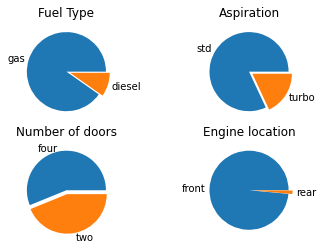

In [9]:
# Visualização da distribuição das características binárias
fig, axs = plt.subplots(2, 2, figsize=(6,4))
axs[0, 0].pie(x=df['fuel-type'].value_counts(), labels=list(df['fuel-type'].value_counts().index), explode = (0, 0.1))
axs[0, 0].set_title("Fuel Type")
axs[0, 1].pie(x=df['aspiration'].value_counts(), labels=list(df['aspiration'].value_counts().index), explode = (0, 0.1))
axs[0, 1].set_title("Aspiration")
axs[1, 0].pie(x=df['num-of-doors'].value_counts(), labels=list(df['num-of-doors'].value_counts().index), explode = (0, 0.1))
axs[1, 0].set_title("Number of doors")
axs[1, 1].pie(x=df['engine-location'].value_counts(), labels=list(df['engine-location'].value_counts().index), explode = (0, 0.1))
axs[1, 1].set_title("Engine location")
plt.show()

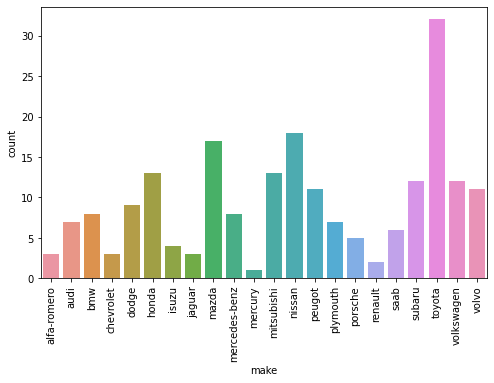

In [10]:
# Distribuição das montadoras
plt.figure(figsize=(8,5))
sns.countplot(df.make)
plt.xticks(rotation=90)
plt.show()

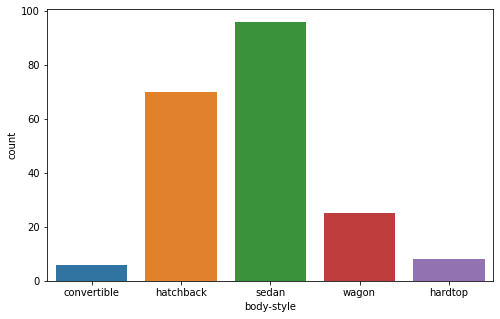

In [11]:
# Distribuição dos modelos
plt.figure(figsize=(8,5))
sns.countplot(df['body-style'])
plt.show()

<h1 id="data-transformation">Transformação dos Dados</h1>

<h3>Avaliando os Dados faltantes</h3>

In [12]:
df.isnull().sum().sum()

59

In [13]:
missing_data = df.isnull()
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<h3>Contando os valores faltantes</h3>

In [14]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

De acordo com o resultado acima, cada coluna tem 205 linhas de dados, 7 colunas tem dados faltantes:
<ol>
    <li>"normalized-losses": 41</li>
    <li>"num-of-doors": 2</li>
    <li>"bore": 4</li>
    <li>"stroke" : 4</li>
    <li>"horsepower": 2</li>
    <li>"peak-rpm": 2</li>
    <li>"price": 4</li>
</ol>

<h3>Tratando os dados faltantes</h3>
Existem diferentes maneiras de tratar os dados faltantes em um conjunto de dados. A opção por um determinado método é livre, porém, alguns métodos são mais indicados do que outros em diferentes situações. Aqui, vamos aplicar alguns métodos em diferentes colunas:

<b>Substituição pela média:</b>
<ul>
    <li>"normalized-losses": 41 missing data</li>
    <li>"stroke": 4 missing data</li>
    <li>"bore": 4 missing data</li>
    <li>"horsepower": 2 missing data</li>
    <li>"peak-rpm": 2 missing data</li>
</ul>

<b>Substituição pela maior frequência de ocorrência:</b>
<ul>
    <li>"num-of-doors": 2 missing data, substituir por "four".</li>
</ul>

<b>Exclusão da linha inteira:</b>
<ul>
    <li>"price": 4 missing data </li>
</ul>

<h4>Determinação da média das colunas</h4>

In [15]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)
avg_stroke = df['stroke'].astype('float').mean(axis=0)
print("Average of stroke:", avg_stroke)
avg_bore = df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)
avg_peak_rpm = df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peak_rpm)

Average of normalized-losses: 122.0
Average of stroke: 3.255422885572139
Average of bore: 3.3297512437810943
Average horsepower: 104.25615763546799
Average peak rpm: 5125.369458128079


<h4>Substituição de "NaN" pela média</h4>

In [16]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)
df["stroke"].replace(np.nan, avg_stroke, inplace=True)
df["bore"].replace(np.nan, avg_bore, inplace=True)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)
df['peak-rpm'].replace(np.nan, avg_peak_rpm, inplace=True)

<h4>Verificação da ocorrência de valores</h4>

In [17]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

<h4>Substituição de "NaN" pela maior frequência</h4>

In [18]:
df["num-of-doors"].replace(np.nan, "four", inplace=True)

<h4>Exclusão da linha inteira</h4>

In [19]:
df.dropna(subset=["price"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [20]:
df.isnull().sum().sum()

0

<h2 id="data_standardization">Padronização dos Dados</h2>
<p>
Os dados podem ser coletados por diferentes meios e em diferentes formatos. A padronização consiste em transformar os dados em um formato comum permitindo que os dados sejam comparados
</p>

<b>Exemplo</b>
<p>Transformar mpg para L/100km:</p>
<p>No nosso conjunto de dados, as colunas que informam o consumo de combustível "city-mpg" e "highway-mpg" são representados em unidade americanas (mpg - miles per gallon). Para melhor compreensão, vamos transformar para o padrão L/100km</p>

<p>A fórmula para conversão de unidades é<p>
L/100km = 235 / mpg


In [21]:
# Converte mpg para L/100km
df['city-L/100km'] = 235/df["city-mpg"]
df['highway-L/100km'] = 235/df["highway-mpg"]

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,10.681818


<h2 id="data_normalization">Normalização dos Dados</h2>

<p>Alguns dados apresentam valores numéricos em escalas muito diferentes, o que dificulta a comparação. Para que estes dados possam ser comparados é realizada a normalização dos dados. Portanto, a normalização é o processo de transformar valores de variáveis em uma escala similar. Normalizações típicas incluem transformar os dados para uma escala de média 0, de variância 1, ou de intervalo entre 0 e 1.
</p>

<b>Exemplo</b>
<p>Neste exemplo, vamos transformar as colunas "length", "width" and "height" </p>
<p><b>Objetivo:</b> vamos normalizar estas variáveis para valores de 0 a 1.0</p>
<p><b>Abordagem:</b> substituir os valore originais por (valor original)/(valor máximo)</p>

In [22]:
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()
df[['length','width', 'height']].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027
